In [9]:
import warnings
warnings.filterwarnings('ignore')
import time
import pandas as pd
from simple_salesforce import Salesforce
import networkx as nx

proxies = {
sf = Salesforce(username = username,
                password = password,
                security_token = token,
                sandbox = isSandbox,
                proxies = proxies)

In [10]:
parents = pd.read_excel('C:/users/jschlajo/desktop/parentTree.xlsx')
parents.dropna(inplace=True)

In [11]:
parents.head()

,Child,Parent
0,1- Global Business Leads,Global Business Admin
1,ADT Global Accounts Manager,ADT Global Accounts Regional Director
2,ADT Global Accounts Regional Director,Tyco System Admin
3,ADT Portugal,Iberia_Old
4,ADT RSA Fire GM,ADT South Africa GM


In [12]:
child_to_parent_map = dict(zip(parents.Child, parents.Parent))

In [13]:
G = nx.Graph()
G.add_edges_from(list(child_to_parent_map.items()))
list(G.neighbors('Tyco System Admin'))

['ADT Global Accounts Regional Director',
 'ADT South Africa GM',
 'ADT UK GM',
 'Global Business Admin',
 'Global Operations GM',
 'Private hierarchy',
 'UK&I Installation & Service Admin']

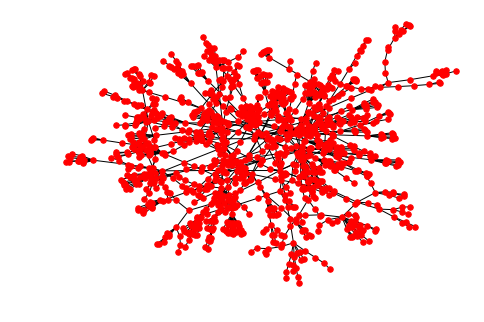

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

pos = nx.spring_layout(G)
nx.draw(G,node_size=30,font_size=8) 

plt.show()

In [10]:
roles = sf.query_all("SELECT Title, Id, Role_Name__c, ManagerId, IsActive from User WHERE c_Tyco_Operating_Co__c  LIKE '%Tyco%' OR c_Tyco_Operating_Co__c LIKE '%CRM%'")
roles = pd.DataFrame.from_records(roles['records'])

In [22]:
list(nx.all_shortest_paths(G, 'Global Business Admin', 'JCI Security (NA) – Area 7_LM1_D653 Sales Rep'))

[['Global Business Admin',
  '1- Global Business Leads',
  'I&S North America',
  'TIS GM/Admin/Governance/CLG',
  'TIS - Sr. VP - Commercial Sales',
  'JCI Security (NA) - Sr Sales Director',
  'JCI Security (NA) – Regional Sales Director West',
  'JCI Security (NA) – Area 7 (Fort Worth, TX) AGM',
  'JCI Security (NA) – Area 7 ASL',
  'JCI Security (NA) – Area 7_LM1_D653 CSM',
  'JCI Security (NA) – Area 7_LM1_D653 Sales Rep']]

In [11]:
def getDistance(row):
    try:
        lst = list(nx.all_shortest_paths(G, 'Global Business Admin', row.Role_Name__c))[0][::-1]
        # get entire path from highest level to given emplpoyee's role
        # reverse path to iterate over until managers role is found, given index is how many levels away from their employee in the graph/ tree they sit
        if row.Role_Name_mgr in lst:
            return lst.index(row.Role_Name_mgr)
        else:
            return "Role not in Manager's tree"
    except:
        return 'Role does not exist in Graph'

In [17]:
roles['levels'] = roles.apply(getDistance, axis=1)

In [18]:
roles[['Title','Role_Name__c','Role_Name_mgr','levels']]['levels'].value_counts()

1                               988
Role does not exist in Graph    898
Role not in Manager's tree      588
0                               221
2                                86
3                                52
4                                20
5                                 8
6                                 5
7                                 2
10                                1
9                                 1
Name: levels, dtype: int64